# *Escherichia coli* as a cell factory for Serine production

## 1. Introduction

### 1.1 Literature review of the compound (<500 words)

***Applications of L-Serine***

L-serine is a non-essential amino acid with expanding applications in the industry with fast-growing market demand. It is currently applied in industries ranging from food to cosmetics and has also demonstrated novel potential in pharmaceutical industries. In the food industry, L-serine is a nutritional supplement, in the cosmetic industries as a moisturizing agent in antiaging skincare products, and in the pharmaceutical industry as a significant compound in third-generation amino acid infusion with a functionality on the central nervous system. 

***Evaluation of market potential***

In 2020, the estimated global market size for L-serine is 305.4 million USD and is estimated to reach 346 million USD already in 2026.  Furthermore, L-serine can also be converted to other high-value chemicals such as L-cysteine by bio-catalysis with a projected market price of 140 million USD annually. 
In addition, L-cysteine can be converted to methionine, an animal feed supplement, with a global market of 3 billion USD . However, to convert L-serine to other bulk products cost efficiently, a strain producing L-serine with high yield and high titer is crucial. Decreasing the amino acid production price will also open for the use of the amino acid as a bulk chemical with additional applications in, for example, the polymer industry 

***Biosynthetic Pathway or Gene***

*In vitro*, L-serine can be produced in a cell factory using an engineered *Escherichia coli* strain. In the literature, a three-step biosynthetic pathway of L-serine and the corresponding genes (*serA*, *serC*, and *serB*) for the three reactions have been identified (1). The initial step is catalyzed by NAD+-dependent 3-phosphoglycerate dehydrogenase (PGDH, EC 1.1.1.95) encoded by *serA*, resulting in the formation of 3-phosphohydroxypyruvate. Subsequently, phosphoserine aminotransferase (EC 2.6.1.52), encoded by *serC*, transfers the amino unit from L-glutamate to generate 3-phosphoserine. The last step of the phosphotransferase reaction is completed by the phosphoserine phosphatase (PSP, EC 3.1.3.3) encoded by *serB*, possibly involving an enzyme-bound phosphoaspartate as an intermediate (Figure 1). 

Two main pathways are involved in L-serine degradation: the reversible conversion of L-serine to glycine catalyzed by serine hydroxymethyl transferase (EC 2.1.2.1, glyA) and the degradation to pyruvate by L-serine dehydratase (*sdaA*, *sdaB*, and *tdcG*) in *E. coli* (Figure 1) (1).


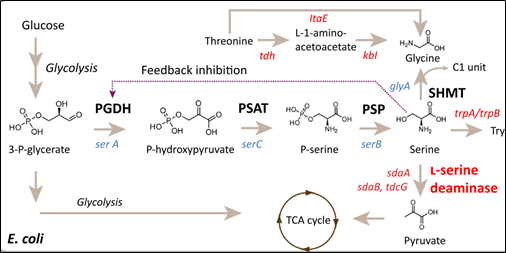

*Figure 1: Biosynthetic pathway of L-serine in E. coli.* 

The proposed project aims to study the potential bottlenecks in increasing L-serine yield using genome-scale metabolic models (GEM) to identify new targets for further engineering and to apply this knowledge to engineer further enhanced production strains.  

### 1.2 Literature review of the cell factory (<500 words)

Currently, L-serine production relies mainly on cellular conversion from the precursor glycine plus a C1 compound such as methanol using methylotrophs or *Cornybacterium glutamicum*. In this process, around 90% of glycine supplied is converted to serine, taking 5 days to complete. Glycine is significantly more expensive than glucose leading to a high production cost of L-serine. Hence, the dependence on high-priced substrates and the low yield, makes it less attractive and economically unsustainable (2). Serine has the potential to be made from glucose by fermentation in *E. coli* with a very high theoretical yield (23/10 mmol is 1.34 g/g of glucose 0.3 g/g of glucose). *E. coli* could be a promising alternative as it utilizes cheap alternative substrates such as glucose, glycerol, or other similar sugars as well.

*E. Coli* is an ideal platform host for developing viable products, as it has several advantages; genetic tractability, favorable growth conditions, well-characterized biochemistry and physiology, and availability of versatile genetic manipulation tools for the development of viable productions. Significantly, for the amino acid production, *E. coli* has shown the potential and surpassed traditional native producers such as *C. glutamicum*. 

Conversely, *E. Coli*, as a cell factory, also has some disadvantages such as; being  ***Missing ?***


It is still difficult ot express complex proteins or develop photosynthetic machinery. Thus, *E. coli* still cannot utilize cellulosic biomass or methane, and cannot harvest sunlight to fix CO2.
*E. coli* cannot grow under extreme conditions, such as low or high pH, high salt environments, or in temperatures greater than 45 degrees Celsius. These phenotypes may be useful for specific industrial applications as they provide resistance against contamination. 

***Missing ?***
phage attack may also present a major threat to industrial production using bacteria (3)

## 2. Problem definition (<300 words)

L-serine has the potential to be made from glucose by fermentation. In *E. coli* the highest titer and yield achieved is 50 g/L and 0.3 g/g glucose equivalent to 0.514 mmol serine/ mmol glucose. However, the yield and titer are far away from the theoretical yield (2.3 mmol serine/ mmol glucose) previously (Figure 2) (4, 5).

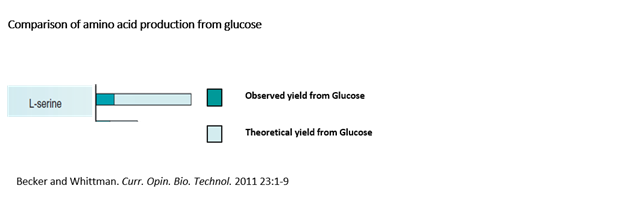

*Figure 2: Observed vs. theoretical yield from glucose.*

In wild-type *E. coli*, about 15% of the assimilated carbon from glucose is directed into the L-serine biosynthetic pathway (6)  , while only 6% of this carbon flow is used for protein synthesis (7)    . As a result, it is difficult to enhance L-serine production from *E. coli*. Therefore, several challenges need to be overcome to produce L-serine at an industrial scale with high titer and reduced cost: (i) substrate utilization to enhance efficiency and expand the substrate spectrum; (ii) precursor availability to enhance metabolic flux to precursors; (iii) L-serine degradation to weaken L-serine degradation pathways; and (iv) L-serine inhibition to remove feedback inhibition and enhance L-serine tolerance as well as transport (1).

## 3. *Project category II:* Selection and assessment of existing GSM (<500 words)

For this project, we selected the iML1515 *E.coli* GSM, a reconstruction of the *E. coli* strain K-12 MG1655, covering 2,712 reactions, 1,516 genes, and 1,169 different metabolites. The MEMOTE Python software was used to assess the quality of the iML1515 (8). The MEMOTE validation showed a high level of consistency (98%), modeling detail with a metabolic coverage of 1.8, and a total score of 91 %, indicating a high-quality GSM model (Figure 3) (https://github.com/27410/27410-2020-group-project-group-6/blob/main/iML1515_memote_Snapshot.html):

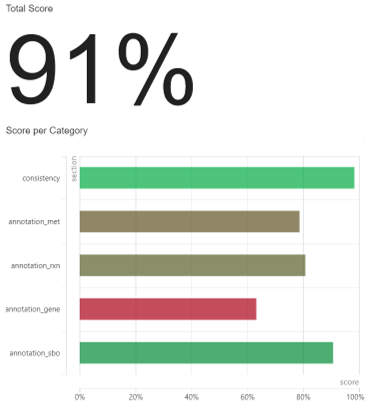

*Figure 3: MEMOTE result of iML1515*

## 4. Computer-Aided Cell Factory Engineering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.visualization import plotting
from cameo.strain_design.deterministic import DifferentialFVA
from cobra.io import read_sbml_model
import pandas as pd
from cobra.flux_analysis import flux_variability_analysis
plt.style.use('seaborn')
%matplotlib inline
import escher
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope
import numpy as np

/usr/local/lib/python3.6/dist-packages/sympy/__init__.py:676 SymPyDeprecationWarning: 

importing sympy.core.singleton with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.singleton instead.
See https://github.com/sympy/sympy/issues/18245 for more info.



In [2]:
model = read_sbml_model("iML1515.xml")

### 4.1 L-serine in the model

In the iML1515 model of *E. coli*, L-serine exists in the cytosol, periplasm and extracellular space as the following metabolites, respectively:

In [3]:
for metabolite in model.metabolites.query('L-Serine', 'name'):
    print(metabolite.id)

ser__L_c
ser__L_p
ser__L_e


These metabolites participate in the following reactions.

In [4]:
# Compartment: Cytosol
ser_reac_C = list()
for reaction in model.metabolites.ser__L_c.reactions:
    if reaction.id != 'BIOMASS_Ec_iML1515_core_75p37M' and reaction.id != 'BIOMASS_Ec_iML1515_WT_75p37M':
        ser_reac_C.append(reaction)
        print(reaction)  

PSSA161: cdpdhdec9eg_c + ser__L_c --> cmp_c + h_c + ps161_c
TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c
PSSA180: cdpdodecg_c + ser__L_c --> cmp_c + h_c + ps180_c
SERt2rpp: h_p + ser__L_p --> h_c + ser__L_c
GHMT2r: ser__L_c + thf_c <=> gly_c + h2o_c + mlthf_c
PSSA140: cdpdtdecg_c + ser__L_c --> cmp_c + h_c + ps140_c
DHBSH: 23dhbzs_c + h2o_c --> 23dhb_c + ser__L_c
SERt4pp: na1_p + ser__L_p --> na1_c + ser__L_c
PSSA120: cdpdddecg_c + ser__L_c --> cmp_c + h_c + ps120_c
SERAT: accoa_c + ser__L_c <=> acser_c + coa_c
PSP_L: h2o_c + pser__L_c --> pi_c + ser__L_c
PSSA160: cdpdhdecg_c + ser__L_c --> cmp_c + h_c + ps160_c
TRPS2: indole_c + ser__L_c --> h2o_c + trp__L_c
PSSA181: cdpdodec11eg_c + ser__L_c --> cmp_c + h_c + ps181_c
SERD_L: ser__L_c --> nh4_c + pyr_c
SERASr: atp_c + h_c + ser__L_c <=> ppi_c + seramp_c
LSERDHr: nadp_c + ser__L_c <=> 2amsa_c + h_c + nadph_c
PSSA141: cdpdtdec7eg_c + ser__L_c --> cmp_c + h_c + ps141_c
GPDDA3: g3ps_c + h2o_c --> glyc3p_c + h_c + ser__L_c
SERtpp

Here, we have reactions transporting L-serine from the cytosol into the perisplasm (SERtpp), or the opposite way (SERt4pp, SERt2rpp), and reactions degrading L-serine (such as SERD_L and GHMT2r among others) or synthesizing L-serine (PSP_L for example). 

In [5]:
# Compartment: Periplasm
ser_reac_P = list()
for reaction in model.metabolites.ser__L_p.reactions:
    ser_reac_P.append(reaction)
    print(reaction)

SERt2rpp: h_p + ser__L_p --> h_c + ser__L_c
SERtex: ser__L_e <=> ser__L_p
PSP_Lpp: h2o_p + pser__L_p --> pi_p + ser__L_p
GPDDA3pp: g3ps_p + h2o_p --> glyc3p_p + h_p + ser__L_p
SERt4pp: na1_p + ser__L_p --> na1_c + ser__L_c
SERtpp: ser__L_c --> ser__L_p


Here, we mostly have reactions transporting L-serine between the periplasm and the cytosol or extracellular space.

In [6]:
# Compartment: Extracellular
ser_reac_E = list()
for reaction in model.metabolites.ser__L_e.reactions:
    ser_reac_E.append(reaction)
    print(reaction)

SERtex: ser__L_e <=> ser__L_p
EX_ser__L_e: ser__L_e --> 


L-serine is transported between the periplasm and the extracellular space by the reaction SERtex, while the reaction EX_ser__L_e is the exchange reaction for L-serine into the environment. In this project, we want to optimize the flux through EX_ser__L_e to make our cell factories produce and secrete as much L-serine as possible into the extracellular space. 



### 4.2 Production of L-serine by *E. coli*



***Biomass as objective***


The wildtype *E. coli* cell will naturally direct the internal fluxes into cell growth, and we investigate how much L-serine is produced when biomass accumulation is the objective for the cell. The calculations are based on the standard medium composition for the model, where only glucose is the available carbon source.

In [7]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [8]:
with model:
    WT_Solution = model.optimize()

    print("Max BM production [mmol gDW^-1 h^-1]:", WT_Solution.objective_value)
    print('L-Serine Production[mmol gDW^-1 h^-1]:', WT_Solution.fluxes.EX_ser__L_e)
    print('Serine to glycine flux:', WT_Solution.fluxes.GHMT2r)
    print('Serine to pyruvate flux:', WT_Solution.fluxes.SERD_L)
    print("Theoretical max. yield [mmol_L-ser / mmol_glc]:", WT_Solution.fluxes.EX_ser__L_e / (-1*WT_Solution.fluxes.EX_glc__D_e))

    

Max BM production [mmol gDW^-1 h^-1]: 0.8769972144269618
L-Serine Production[mmol gDW^-1 h^-1]: 0.0
Serine to glycine flux: 0.9783188951028198
Serine to pyruvate flux: 0.0
Theoretical max. yield [mmol_L-ser / mmol_glc]: 0.0


As seen, there is no production of L-serine. The degradation of L-serine into glycine and pyruvate was also looked into, and under the natural aim of biomass accumulation, there was positive flux from serine to glycine, while no L-serine appeared to be converted to pyruvate. 

A phenotypic phase plane visualizes the relationship between growth of cells and L-serine production. The plot confirms that at maximized biomass, no L-serine is produced.

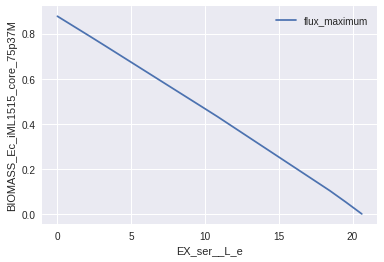

In [9]:
ppp_serine = production_envelope(model,
                    reactions=[model.reactions.EX_ser__L_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)

ppp_serine.plot(x='EX_ser__L_e', y='flux_maximum')
plt.ylabel('BIOMASS_Ec_iML1515_core_75p37M')
plt.show()

To visualize the fluxes in the wildtype when the objective is cell growth, a metabolic map was created with Escher (9).

In [10]:
from cameo import load_model
from cameo import fba
model1 = load_model('iML1515.xml')
WT_model = fba(model1)

In [11]:
WT_model.display_on_map('Working files/iJO1366.Central metabolism with Serine.json')


On the metabolic map there are no fluxes towards serine production that are used for cell growth. There are no fluxes towards the L-serine efflux as the wildtype do not secrete L-serine.

***L-serine production as objective***

We now investigate the flux values if the cells direct all fluxes into L-serine production.

In [12]:
with model:
    model.objective = model.reactions.EX_ser__L_e
    Ser_Prod = model.optimize();
    
    print("BM production [mmol gDW^-1 h^-1]:", Ser_Prod.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
    print('Max Serine Production[mmol gDW^-1 h^-1]:', Ser_Prod.fluxes.EX_ser__L_e)
    print('Serine to glycine flux:', Ser_Prod.fluxes.GHMT2r)
    print('Serine to pyruvate flux:', Ser_Prod.fluxes.SERD_L)
    print("Theoretical max. yield [mmol_L-ser / mmol_glc]:", Ser_Prod.fluxes.EX_ser__L_e / (-1*Ser_Prod.fluxes.EX_glc__D_e))
    

BM production [mmol gDW^-1 h^-1]: 0.0
Max Serine Production[mmol gDW^-1 h^-1]: 20.625882352941208
Serine to glycine flux: -0.6258823529411823
Serine to pyruvate flux: 0.0
Theoretical max. yield [mmol_L-ser / mmol_glc]: 2.062588235294121


The maximum  flux  of L-serine the cells are able to produce, according to the iML1515 model, is shown to be 20.63 mmol gDW^-1 h^-1, giving a yield on glucose of 2.063 mmol L-serine/ mmol glucose close to the reported maximum theoretical yield (section 2). From the escher map, we could also observe that except the serine production pathway all other important central metabolic pathways (TCA, Pentose phosphate pathway) showed no flux which is not experimentally feasible. It is also revealed that this objective results in no production of biomass at all, and therefore no cell growth, as could also be seen from the phenotypic phase plane above. 

An interesting observation from the flux map was the switch of glucose uptake from PTS to Non-PTS route (Reaction GLCptspp to G6PP and HEX1) which seems to be essential for maximization of L- serine production, which could be a potential target for cell factory engineering. 


The fluxes when L-serine production is maximized are visualized in a map:

In [13]:
with model1:
    model1.objective = model1.reactions.EX_ser__L_e
    model1.optimize()
    Ser_model = fba(model1)

In [14]:
Ser_model.display_on_map('Working files/iJO1366.Central metabolism with Serine.json')

When the L-serine production is maximised all fluxes are diverted to the L-serine production and secretion, while other pathways needed to sustain the cells are depleted.

### 4.3 Gene targets for L-serine production from literature

***L-serine degradation knock-outs***

L-serine is degraded into glycine by the gene *glyA* and into puruvate by the five genes *tnaA*, *tdcB*, *tdcG*, *sdaA* and *sdaB* (see below). Studies have shown that L-serine production can be enchanced by knocking out *glyA* and three of the five pyruvate generating genes, *tdcG*, *sdaA* and *sdaB* (1). Here, we knock out the same three genes and the reaction GHMT2r by *glyA* in the model to assess the effect on L-serine production. As the strain becomes auxotrophic for glycine with the *glyA* knockout, we add a constraint for the glycine uptake from medium as reported in literature (2). The model is optimized for biomass production to mimic realistic cell behaviour. 

In [15]:
# Genes involved in the degradation of L-serine to pyruvate
Ser_to_Pyr_genes = list()
Genes_to_KO = list() 
for genes in model.reactions.SERD_L.genes:
         Ser_to_Pyr_genes.append(genes)
         print(genes,genes.name) 

b1814 sdaA
b2797 sdaB
b4471 tdcG
b3117 tdcB
b3708 tnaA


In [16]:
#1. GlyA Knockout
#model.reactions.GHMT2r   GHMT2r: ser__L_c + thf_c <=> gly_c + h2o_c + mlthf_c

# 2. Constrain Glycine Exchange Flux 
# Since glyA is an essential reaction, glycine is added in the medium, so a flux constraint is added

# 3. Pyruvate reaction knockout
#model.reactions.SERD_L  SERD_L: ser__L_c --> nh4_c + pyr_c
# Of the 5 genes of the reaction SERD_L, only three were knocked out in the Paper (Zhang et al.): tdcG, sdaA and sdaB

model_KO = model.copy()
model_KO.reactions.GHMT2r.knock_out()
model_KO.reactions.EX_gly_e.bounds =(-5,1000)
model_KO.genes.b1814.knock_out() #sdaA
model_KO.genes.b2797.knock_out() #sdaB
model_KO.genes.b4471.knock_out() #tdcG

with model_KO:
    print("Max BM production [mmol gDW^-1 h^-1]:", model_KO.optimize().objective_value)
    print('Serine Production[mmol gDW^-1 h^-1]:', model_KO.optimize().fluxes.EX_ser__L_e)
    print('Serine to glycine flux:', model_KO.optimize().fluxes.GHMT2r)
    print('Serine to pyruvate flux:', model_KO.optimize().fluxes.SERD_L)
    print('Glycine uptake flux:', model_KO.optimize().fluxes.EX_gly_e)
    print("Theoretical yield [mmol_L-ser / mmol_glc]:", model_KO.optimize().fluxes.EX_ser__L_e / (-1*model_KO.optimize().fluxes.EX_glc__D_e))
 

Max BM production [mmol gDW^-1 h^-1]: 0.9850507745630366
Serine Production[mmol gDW^-1 h^-1]: 0.0
Serine to glycine flux: 0.0
Serine to pyruvate flux: 0.0
Glycine uptake flux: -5.0
Theoretical yield [mmol_L-ser / mmol_glc]: 0.0


There is still no production of L-serine.
 

***Overexpression of serine biosynthesis genes serABC***

Studies optimizing biomass production had also shown that overexpression of the *serABC* genes from a plasmid resulted in better L-serine production in *E. coli* (2). 
We mimic this in the model by setting the flux bounds to a fixed flux of 20 mmol gDW^-1 h^-1 through all three reactions encoded by the genes. The value of 20 was chosen, since the maximum titer of L-serine possible was shown to be ~20 mmol gDW^-1 h^-1, and this value was significantly higher than the flux through the three reactions under wild type conditions, 1.5 mmol gDW^-1 h^-1 (see below). The overexpression was carried out on the *E. coli* model with the L-serine degradation pathways knocked out. 

In [17]:
# L-serine biosynthesis genes and reactions
# serA: reaction PGCD   # 3pg_c + nad_c --> 3php_c + h_c + nadh_c
# serC: reaction PSERT  # 3php_c + glu__L_c --> akg_c + pser__L_c
# serB: reaction PSP_L    # h2o_c + pser__L_c --> pi_c + ser__L_c

In [18]:
# Flux through the biosynthesis genes in the wild type
with model:
    solution = model.optimize()
    print('serA flux:', solution.fluxes.PGCD)
    print('serC flux:', solution.fluxes.PSERT)
    print('serB flux:', solution.fluxes.PSP_L)
    

serA flux: 1.5065360713465665
serC flux: 1.5065360713465665
serB flux: 1.5065360713465665


In [19]:

model_KO_overexpression = model_KO.copy()

model_KO_overexpression.reactions.PGCD.bounds =(20,20)
model_KO_overexpression.reactions.PSERT.bounds =(20,20)
model_KO_overexpression.reactions.PSP_L.bounds =(20,20)
model_KO_overexpression.reactions.SERD_L.knock_out() # The serine to pyruvate pathway needs to be completely knocked out

with model_KO_overexpression:
    print("Max BM production [mmol gDW^-1 h^-1]:", model_KO_overexpression.optimize().objective_value)
    print('Serine Production[mmol gDW^-1 h^-1]:', model_KO_overexpression.optimize().fluxes.EX_ser__L_e)
    print('Serine to glycine flux:', model_KO_overexpression.optimize().fluxes.GHMT2r)
    print('Serine to pyruvate flux:', model_KO_overexpression.optimize().fluxes.SERD_L)
    print('Glycine uptake flux:', model_KO_overexpression.optimize().fluxes.EX_gly_e)
    print('serA flux:', model_KO_overexpression.optimize().fluxes.PGCD)
    print('serC flux:', model_KO_overexpression.optimize().fluxes.PSERT)
    print('serB flux:', model_KO_overexpression.optimize().fluxes.PSP_L)
     

Max BM production [mmol gDW^-1 h^-1]: 0.8547181438556017
Serine Production[mmol gDW^-1 h^-1]: 0.0
Serine to glycine flux: 0.0
Serine to pyruvate flux: 0.0
Glycine uptake flux: -5.0
serA flux: 20.0
serC flux: 20.0
serB flux: 20.0


Still, there is no L-serine production, despite what has been shown experimentally. We instead applied the computational tools to predict targets for L-serine production in our model.

### 4.4 *In silico* prediction of gene targets

Different algorithms were applied to the model with varying success to predict promising gene targets. OptGene and optKnock algorithms were used to determine optimal knock-outs for L-serine production. However, the optGene did not return any targets, while optKnock stopped working and was not able to complete the calculations. This was also the case for the prediction of heterologous pathways. A Flux variance analysis (FVA), a differential FVA, and a flux Scanning based on Enforced Objective Flux (FSEOF) were carried out.

***Differential FVA***

*** Priya ***

Differential FVA to identify gene modulation targets

pd.set_option('display.max_rows', None)
plotter = PlotlyPlotter()

model.reactions.EX_o2_e.lower_bound = 0
reference_model = model.copy()
biomass_rxn = reference_model.reactions.BIOMASS_Ec_iML1515_core_75p37M
biomass_rxn.lower_bound = 0
target = reference_model.metabolites.ser__L_e


diff_fva = DifferentialFVA(design_space_model=model,
                           reference_model=reference_model,
                           objective=target,
                           variables=[biomass_rxn],
                           normalize_ranges_by=biomass_rxn,
                           points=10)



%time result = diff_fva.run(surface_only=True)
#result.plot()
result

*** more FVA, Priya ***

Calculate all flux ranges of all reactions in the model

result = flux_variability_analysis(model,loopless= True)
result

result.describe()

***Flux variance analysis (FVA)***

A flux variance analysis was done for reactions involved in the production, degradation and transport of serine in the cells to determine their minimum and maximum fluxes with a target of retaining 90 % of optimal cell growth.

In [20]:
# Flux variability analysis of reactions to ser_L at 90% BM
reactions_OE = [model.reactions.PGCD, model.reactions.PSERT, model.reactions.PSP_L,model.reactions.SERAT, model.reactions.GHMT2r, 
                model.reactions.LSERDHr,model.reactions.SERD_L, model.reactions.TRPS2, model.reactions.GPDDA3pp, model.reactions.SERtpp,
                model.reactions.SERtex, model.reactions.EX_ser__L_e, model.reactions.BIOMASS_Ec_iML1515_core_75p37M,
               model.reactions.GLCt2pp]
fva = flux_variability_analysis(model, reaction_list = reactions_OE,
fraction_of_optimum=0.9)
print(fva)

                                 minimum    maximum
PGCD                            0.000000  24.670609
PSERT                           0.000000  15.865461
PSP_L                           0.000000  15.865461
SERAT                           0.195337   9.676144
GHMT2r                         -4.507400   9.466666
LSERDHr                         0.000000  14.513470
SERD_L                          0.000000  14.513470
TRPS2                           0.000000  14.513470
GPDDA3pp                        0.000000   0.000000
SERtpp                          0.000000  93.256000
SERtex                         -2.168744   0.000000
EX_ser__L_e                     0.000000   2.168744
BIOMASS_Ec_iML1515_core_75p37M  0.789297   0.876997
GLCt2pp                         0.000000  10.000000


***FSEOF to identify gene modulation targets***

A Flux Scanning based on Enforced Objective Flux (FSEOF) algorithm was carried out to identify new modulation genes. All results from this analysis can be found in the 'Working files' folder (https://github.com/27410/27410-2020-group-project-group-6/blob/main/Working%20files/FSEOF.ipynb). The FSEOF algorithm identifies that the reaction SERtpp will increase precisely the same flux value as the exchange flux reaction of L-serine (EX_ser_L_e) (Figure 4). SERtpp reaction is the facilitated transport of L-serine out of the cytosol into the periplasm. This effect of SERtpp and other reactions that showed a remarkable change in flux from the FSEOF analysis were tested in the iML1515 model.

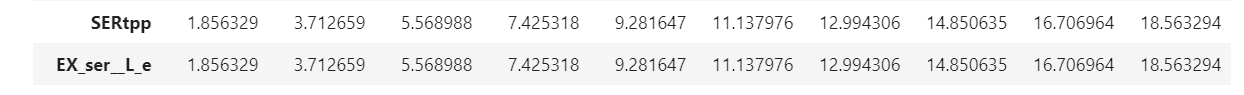
*Fig 4: Bottom of the results table from the FSEOF analysis.*

In [21]:
model.reactions.SERtpp

Reaction identifier,SERtpp
Name,L-serine export via facilitated transport
Memory address,0x07fd65b8e43c8
Stoichiometry,ser__L_c --> ser__L_p L-Serine --> L-Serine
GPR,b1533
Lower bound,0.0
Upper bound,1000.0


***Manual testing of gene modulations***

Results from the FVA and FSEOF analyses, along with the reactions the metabolite ser__L_p (L-serine in the periplasm) participates in, were investigated manually in the model. 

In [22]:
model.metabolites.ser__L_p.summary()

Below is reported first the interesting fluxes and yield from the wild type model again. Hereafter, alterations on the model were tested manually from the FSEOF analysis results (the ones that seemed to have been changed the most in the analysis). Also, results from the FVA analysis were included, and finally, reactions from the reaction summary of the metabolite ser__L_p were knocked out or the flux altered to investigate the effect on L-serine production and biomass.

Alteration of the genes below resulted in L-serine production when optimizing for biomass, meaning the cells would be able to grow while also producing and exporting L-serine. Inactivating the gene alterations (by making them into a comment, #) revealed that only 3 genes (SERtpp, SERt4pp, and SERt2rpp) alterations were important for L-serine production.

In [23]:
with model:
    print("Wild type")
    solution = model.optimize()
    print("Max BM production [mmol gDW^-1 h^-1]:", solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])
    print('Serine Production [mmol gDW^-1 h^-1]:',solution.fluxes.EX_ser__L_e)
    print('Glucose flux: ', solution.fluxes.EX_glc__D_e)
    print("Yield on glucose: ", solution.fluxes.EX_ser__L_e / (-1*model.reactions.EX_glc__D_e.flux))

Wild type
Max BM production [mmol gDW^-1 h^-1]: 0.8769972144269733
Serine Production [mmol gDW^-1 h^-1]: 0.0
Glucose flux:  -10.0
Yield on glucose:  0.0


In [24]:
with model:
    print("Altered")
    
    # From FSEOF:
    #model.reactions.PFK_3.bounds = 9.5,1000
    #model.reactions.PGI.bounds = 10,1000
    #model.reactions.PGK.bounds = -19,-19
    #model.reactions.PGL.knock_out()
    #model.reactions.PYK.knock_out()
    #model.reactions.GND.knock_out()
    #model.reactions.G6PDH2r.knock_out()
    #model.reactions.PSERT.bounds = 18,1000
    #model.reactions.HEX1.bounds = 9,1000
    #model.reactions.PSP_L.bounds = 18,1000
    #model.reactions.GLCt2pp.bounds = 9.3,1000
    #model.reactions.Htex.bounds = -19,-19
    #model.reactions.PAPSR2.bounds = -1000, 0.025
    #model.reactions.NH4tpp.bounds = 19.6, 1000
    #model.reactions.GLUt2rpp.bounds = -1000, 0.000512
    #model.reactions.PGCD.bounds = 18.6, 1000
    #model.reactions.TPI.bounds = 9.9,1000
    #model.reactions.RPI.bounds = -1000, -0.073
    #model.reactions.VPAMTr.bounds = -1000, 0.042
    
    # From FVA: 
    #model.reactions.SERAT.bounds = 9.6, 1000
    #model.reactions.GHMT2r.bounds = 9.45, 1000
    #model.reactions.LSERDHr.bounds = 14.5, 1000
    #model.reactions.SERD_L.bounds = 14.5, 1000
    model.reactions.SERtpp.bounds = 18.5,1000   # *** L-serine export via facilitated transport, value 18.5 from FSEOF
    #model.reactions.TRPS2 .bounds = 14.5, 1000 
    #model.reactions.GHMT2r.bounds = 9.45, 1000
    
    # More (from reactions on metabolite ser__L_p):
    model.reactions.SERt4pp.knock_out() # *** L-serine via sodium symport (periplasm) (uptake)
                                        # Either knocked out or reversed (export of L-serine) - if possible
    #model.reactions.SERt4pp.bounds = -1,-1 # Negative flux increases serine exchange (also decreases biomass)
    
    model.reactions.SERt2rpp.knock_out() # *** L-serine reversible transport via proton symport (periplasm) (uptake)
                                         # Either knocked out or reversed (export of L-serine) - if possible
    #model.reactions.SERt2rpp.bounds = -1,-1 # Negative flux increases serine exchange (also decreases biomass)
    
    #model.reactions.PSP_Lpp.bounds = 20,1000
    #model.reactions.SERtex.bounds = -18.5,-18.5 # diffusion, flux cannot be altered in reality
    solution = model.optimize()
    
    print("Max BM production [mmol gDW^-1 h^-1]:", solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])
    print('Serine Production [mmol gDW^-1 h^-1]:',solution.fluxes.EX_ser__L_e)
    print('Glucose flux: ', solution.fluxes.EX_glc__D_e)
    print("Yield on glucose: ", solution.fluxes.EX_ser__L_e / (-1*model.reactions.EX_glc__D_e.flux))


Altered
Max BM production [mmol gDW^-1 h^-1]: 0.10122461050799207
Serine Production [mmol gDW^-1 h^-1]: 18.5
Glucose flux:  -10.0
Yield on glucose:  1.85


The 3 gene alterations necessary is overexpression of the reaction SERtpp, the L-serine exporter mentioned above, and knock outs of the reactions SERt4pp and SERt2rpp, both L-serine importers.

The yield on glucose when setting the flux through SERtpp to 18.5 was 1.85 mmol L-serine/ mmol glucose, a value much higher than the yield of 0.514 achieved in fermentation (see section 2).  
When investigating different reversed flux boundaries (negative flux) of L-serine importers, L-serine production would increase further. However, the negative flux implies the L-serine importers become exporters, which is probably not possible in-vitro. In this light, the importers' knockout strategy and overexpression of the native exporter would be the best solution. Also, it seems like the flux through the export reaction SERtpp determines the overall L-serine production. This finding was investigated further

### 4.5 Combining literature- and *in silico* predicted results

The alterations from the in silico investigation of L-serine production are implemented into the model made from literature results to see if the knock-outs of L-serine degradation and overexpression of the biosynthesis genes will affect the L-serine production further:

In [25]:
altered_model = model_KO_overexpression.copy()

altered_model.reactions.SERtpp.bounds = 0,1000   # L-serine export via facilitated transport
altered_model.reactions.SERt4pp.knock_out() # L-serine via sodium symport (periplasm) (uptake)
altered_model.reactions.SERt2rpp.knock_out() # L-serine reversible transport via proton symport (periplasm) (uptake)

# Checking the results are the same
with model:
    print("ALTERED MODEL")
    altered_model.reactions.SERtpp.bounds = 18.5,1000 
    solution = altered_model.optimize()
    print("Max BM production [mmol gDW^-1 h^-1]:", solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])
    print('Serine Production[mmol gDW^-1 h^-1]:', solution.fluxes.EX_ser__L_e)
    print('Glucose flux: ', solution.fluxes.EX_glc__D_e)
    print("Yield on glucose: ", solution.fluxes.EX_ser__L_e / (-1*altered_model.reactions.EX_glc__D_e.flux))
    print('Serine to glycine flux:', solution.fluxes.GHMT2r)
    print('Serine to pyruvate flux:', solution.fluxes.SERD_L)
    print('Glycine uptake flux:', solution.fluxes.EX_gly_e)
    print('serA flux:', solution.fluxes.PGCD)
    print('serC flux:', solution.fluxes.PSERT)
    print('serB flux:', solution.fluxes.PSP_L)
    
altered_model.reactions.SERtpp.bounds = 0,1000 

ALTERED MODEL
Max BM production [mmol gDW^-1 h^-1]: 0.1654847275213709
Serine Production[mmol gDW^-1 h^-1]: 18.5
Glucose flux:  -10.0
Yield on glucose:  1.85
Serine to glycine flux: 0.0
Serine to pyruvate flux: 0.0
Glycine uptake flux: -5.0
serA flux: 20.0
serC flux: 20.0
serB flux: 20.0


In this altered model, the bounds for the export reaction SERtpp is 0-1000, since we want to be able to set the flux to different values and investigate the optimal overexpression.

Implementation of the targets from the literature resulted in the same titer of L-serine as above, but the biomass increased from ~0.10 [mmol gDW^-1 h^-1] to 0.17 [mmol gDW^-1 h^-1] when the flux through SERtpp is 18.5 [mmol gDW^-1 h^-1]. Combining the results from literature with the in silico predicted targets thereby results in optimized L-serine production and growth.

***Phenotypic phase planes***

To investigate the relationships between the flux through the L-serine exporter (SERtpp), the overall serine efflux (EX_ser__L_e) and biomass in the new model, we looked into the phenotypic phase planes. 

First, the effect of the flux in the L-serine exporter (SERtpp) on the overall serine efflux (EX_ser__L_e) was plotted. To determine the relationship, an equation for the trendline was also calculated.

In [26]:
# EX_ser__L_e vs. SERtpp phenotypic phase plane
ppp_ser_prod_vs_ser_exporter = production_envelope(altered_model,
                    reactions=[altered_model.reactions.SERtpp],
                    objective=altered_model.reactions.EX_ser__L_e)

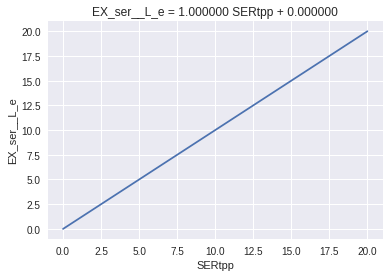

In [27]:
# Creating the trendline and plotting
z = np.polyfit(ppp_ser_prod_vs_ser_exporter['SERtpp'], ppp_ser_prod_vs_ser_exporter['flux_maximum'], 1)
p = np.poly1d(z)
plt.plot(ppp_ser_prod_vs_ser_exporter['SERtpp'],ppp_ser_prod_vs_ser_exporter['flux_maximum'],'-')
plt.ylabel('EX_ser__L_e')
plt.xlabel('SERtpp')
plt.title("EX_ser__L_e = %.6f SERtpp + %.6f"%(z[0],z[1])) # trendline equation
plt.show()

As seen, there is a 1:1 relationship, and in the altered model, the level of flux through the L-serine exporter will determine overall export and therefore the L-serine available from the production. According to this model, increasing flux through the SERtpp exporter will increase available L-serine proportionally, and almost any yield could be obtainable below the upper limit of 2.06 mmol/mmol glucose (section 4.2) where cell growth stops.

It is beneficial to maximize the export from SERtpp as much as possible, while maintaining growth. Therefore, the phenotypic phase plane for growth affected by SERtpp flux is visualized.

In [28]:
ppp_ser_exporter = production_envelope(altered_model,
                    reactions=[altered_model.reactions.SERtpp],
                    objective=altered_model.reactions.BIOMASS_Ec_iML1515_core_75p37M)

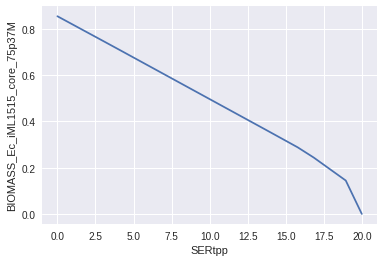

In [29]:
plt.plot(ppp_ser_exporter['SERtpp'],ppp_ser_exporter['flux_maximum'],'-')
plt.ylabel('BIOMASS_Ec_iML1515_core_75p37M')
plt.xlabel('SERtpp')
plt.show()

When maximizing the biomass results in no flux through the exporter; however, too much flux through SERtpp will stop the cells from growing. There is a linear relationship between SERtpp flux and growth rate (Figure: biomass = -0.038 SERttp + 0.87), but when flux through SERtpp gets higher than 15, and especially around 19, the cells growth rate will decrease more drastically when SERtpp flux is changed. It may therefore be beneficial to keep the flux through SERtpp below 15 mmol gDW^-1 h^-1, to obtain a good ratio between growth and L-serine production for the cell factory.

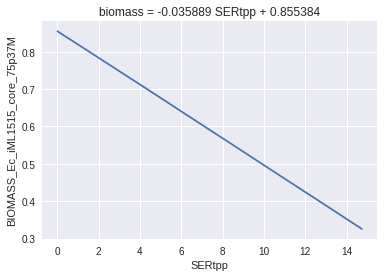

In [31]:
# Creating the trendline and plotting
z = np.polyfit(ppp_ser_exporter['SERtpp'][0:15], ppp_ser_exporter['flux_maximum'][0:15], 1)
p = np.poly1d(z)
plt.plot(ppp_ser_exporter['SERtpp'][0:15],ppp_ser_exporter['flux_maximum'][0:15],'-')
plt.ylabel('BIOMASS_Ec_iML1515_core_75p37M')
plt.xlabel('SERtpp')
plt.title("biomass = %.6f SERtpp + %.6f"%(z[0],z[1])) # trendline equation
plt.show()

For SERtpp flux below 15 mmol gDW^-1 h^-1, we get the linar relationship: 

Biomass flux = -0.035889 * SERtpp flux + 0.855384

The equation for the relationship can be used when designing the production process of L-serine to determine the opitmal overexpression of the SERtpp exporter that will result in maximum L-serine production when also taking the growing biomass into account. 
Further calculations are omitted from this project but would among other things depend on the production process. In a batch production increasing biomass would be more important than in a chemostat, where a large inoculum could be used and the population size should not grow particularly, but be maintained at a certain level *** Is this true?****. 

Another strategy for maximizing L-serine production in a batch fermentation could be inducible production, where the expression of SERtpp  is activated from an inducible promoter only after the biomass has reached a certain level.


### 4.6 Gecko

We investigated if the predictions could be further improved by incorporating enzymatic constraints by using the Gecko algorithm developed by B. Sánchez et al. (10) . This algorithm accounts for the enzymatic part of the reactions, thereby kinetics, which, in theory, will allow us to estimate more biologically feasible fluxes. We used enzymatic data from eciML1515_batch (11). 

The calculations from the Gecko method can be found at Github in the folder ‘Working files’ (https://github.com/27410/27410-2020-group-project-group-6/blob/main/Working%20files/Gecko%20algorithm.ipynb).
 
We were able to identify the top 20 enzymes and corresponding genes that increased the L-serine production the most (Figure 5).

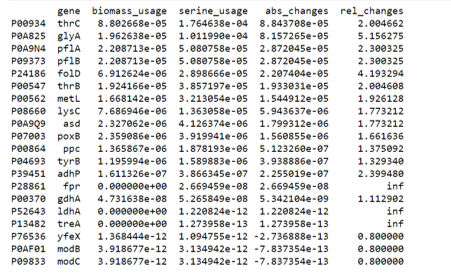

*Figure 5: Top 20 enzymes*

These top 20 enzymes were further validated by using the FSEOF algorithm from cameo. By making this validation, we were able to identify the top 15 genes that are predicted to increase in expression as L-serine production increases (Figure 6). 

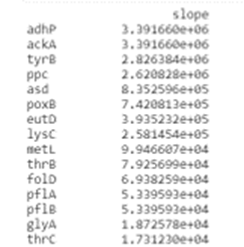

*Figure 6: Top 15 genes increase in L-serine production as each protein usage increases.*

Due to the time constraints of this project, we did not implement these predictions in our model to test their effect on L-serine production, but the results of the Gecko analysis would be good targets for further investigation. 

### 4.7 Most promising cell factory designs

The computational predictions of flux in *Escherichia coli* K-12 MG1655 in this project showed that the most promising cell factory design for L-serine production while maintaining cell growth would be the combination of results from literature and from *in silico* analysis of the metabolic model. In the GSM model here, L-serine was only produced when L-serine export was expressed (SERtpp reaction) and L-serine import was knocked out (SERt4pp and SERt2rpp reaction), while the results from literature (overexpression of genes *serABC* and knockouts of *glyA*, *sdaA*, *sdaB* and *tdcG*) did not not yield higher L-serine production, but instead allowed increased cell growth during production (1). This reveals how the *in silico* model is not reflecting the behaviour of the cells perfectly, since in the experiments from literature, these gene alterations increased the L-serine production. Extensive *in vitro* experiments should be carried out to test our predictions on L-serine production in *E. coli* as well as to use the results to finetune the GSM model.

We propose to test *Escherichia coli* K-12 MG1655 as a cell factory with the following gene modifications:
* A. Overexpression of gene eamA (reaction SERtpp, L-serine exporter) and knock outs of gene sstT (reaction SERt4pp, L-serine importer) and *sdaC* and *tdcC* (both involved in reaction SERt2rpp, L-serine import). 
* B. Overexpression from *serABC* (L-serine biosynthesis). 
* C. Knock-outs of *glyA*, *sdaA*, *sdaB* and *tdcG*  (L-serine degradation into glycine and pyruvate).

It is essential for L-serine production that all three gene modifications in (A) are present in the cells at once, according to the GSM model. We propose to test *E. coli* cells only with modifications (A) and *E. coli* cells only with modifications (B) and (C) (as in literature), as well as cells with all modifications (A), (B) and (C) to assess the *in vitro* relationship between the modifications and to be able to determine which modifications caused the observed effects on L-serine production and cell growth. 
If L-serine production proves to be successful in the cell factories *in vitro*, different levels of overexpression of *eamA* (SERtpp) could be performed to determine the effect on L-serine titer and biomass production and to compare these relationships with the ones modeled in the phenotypic phase planes. 


## 5. Discussion (<500 words)

Computational metabolic modeling is a useful tool for cell factory design to predict potential gene targets that are not obvious or to test out combinations of gene modifications that would otherwise be costly and time-consuming to perform in the laboratory. At the same time, the current GSM models are not complete models with all genes, reactions, and regulatory circuits of the organism they represent, and some phenotypic behavior that occurs *in vitro* is not presented by the model under the same conditions, just as some results from the model may not affect the organism in the predicted way when implemented *in vitro*.

The inconsistency between experimental results and model predictions is evident in this project, where gene modifications to *Escherichia coli* that prompted a high titer of L-serine reported from *in vitro* research (1) did not have any effect on L-serine production in the iML1515 model of *E. coli* used in this project. In the research, overexpression of the biosynthesis genes *serABC*, as well as several gene knockouts, were shown to increase L-serine production. A reason for this not having an effect *in silico* could be the strict optimization for biomass production forced in the model, where the high flux going through the *serABC* biosynthesis genes must result in brief L-serine production, but the amino acid may be utilized for cell growth inside the cell and never be exported out. The overall exchange reaction of L-serine between the cell and the extracellular space was the one we measured here. To better understand why we did not observe L-serine production when implementing the gene modifications from literature, it would be useful to do a flux analysis of the reactions leading away from intracellular L-serine in the mutants. In addition to this, metabolic flux maps could be helpful to the differences in fluxes between the wildtype cells and the mutants. 

Even though we were able to produce L-serine *in silico*, there is no guarantee that the gene targets predicted by the model to increase L-serine titer will have the desired effect when executed *in vitro*. Removing the ability to import L-serine by knocking out *sstT*, *sdaC* and *tdcC* (SERt4pp and SERt2rpp) may be beneficial, since L-serine exported by the cells will stay in the extracellular space to be collected as product. However, it is uncertain how large an effect overexpressing the exporter *eamA* (SERtpp) will have *in vitro*, since the results from the *in silico* model was obtained by forcing a flux through the exporter. In living cells, additional copies of the transporters may not force L-serine through the exporters at all, and the intracellular L-serine could still only be used for growth. On the other hand, L-serine has been produced in *E. coli* many times, such as in the research mentioned previously, so the likely scenario is that L-serine will be produced when implementing the modifications from literature, and if L-serine export is a bottleneck in these cell factories, overexpression of *eamA* (SERtpp) will increase the yield.

If the overexpression of *eamA* (SERtpp) proves to be successful for L-serine production, experiments with different levels of expression of the gene can be conducted, as mentioned in section 4.7, to assess the relationship between expression of the exporter and cell growth, similar to the phenotypic phase planes in section 4.5. An equation for such a relationship can be used when designing the production process of L-serine to determine the optimal overexpression of the SERtpp exporter that will result in maximum L-serine production when also taking the growing biomass into account. Further calculations are omitted from this project but would, among other things, depend on the production process. In a batch production, increasing biomass would be more important than in a chemostat, where a large inoculum could be used, and the population size should not grow particularly, but be maintained at a certain level. Another strategy for maximizing L-serine production by increasing *eamA* (SERtpp) expression in a batch fermentation could be inducible production, where the costly expression of *eamA* is activated from an inducible promoter only after the biomass has reached a certain level.

Apart from experimental tests of the results *in vitro*, further improvement of the cell factory could be to stimulate the cells’ behavior under different medium compositions - changing the carbon source for example. More genes and their effect on L-serine production should also be tested, and an obvious place to start would be to look into the top differentiated genes found in the Gecko analysis. Moreover, to obtain as realistic a model as possible, more omics data could be integrated. 

## 6. Conclusion (<200 words)

With the aim of improving the yield of L-serine on glucose in *Escherichia coli* cell factories, we have investigated the effects of different gene alterations in silico on the genomic scale metabolic model iML1515 representing *E. coli* K-12 MG1655. The strategy was to implement modifications that had previously been shown experimentally to increase the titer of L-serine, as well as modifications that were computed to have a beneficial effect on the production *in silico*. The simulated model was able to produce and export L-serine when there was positive flux through an L-serine exporter and two L-serine importers were knocked out. The targets from literature resulted in an improved growth rate of this L-serine producing cell. Experimental tests of the gene modifications *in vitro* will be necessary to determine the usefulness of the results outside the simulation. If they are proven successful, the yield of L-serine on glucose can be greatly improved from the current maximum achievement of ~0.5 mmol/mmol glucose to any value preferred by the engineer below the *in silico* maximum yield of 2.06. The theoretical maximum yield has been reported as 2.3, which indicates that the GSM model could be improved further, and the yield of L-serine on glucose could potentially be increased even more.

## References

1.  Zhang X, Xu G, Shi J, Koffas MAG, Xu Z. Microbial Production of l-Serine from Renewable Feedstocks. Trends Biotechnol. 2018;36(7):700-12.
2.  Mundhada H, Schneider K, Christensen HB, Nielsen AT. Engineering of high yield production of L-serine in Escherichia coli. Biotechnol         Bioeng. 2016;113(4):807-16.
3.  de Melo AG, Levesque S, Moineau S. Phages as friends and enemies in food processing. Curr Opin Biotechnol. 2018;49:185-90.
4.  Burgard AP, Maranas CD. Probing the performance limits of the Escherichia coli metabolic network subject to gene additions or deletions.       Biotechnol Bioeng. 2001;74(5):364-75.
5.  Becker J, Zelder O, Häfner S, Schröder H, Wittmann C. From zero to hero--design-based systems metabolic engineering of Corynebacterium         glutamicum for L-lysine production. Metab Eng. 2011;13(2):159-68.
6.  Pizer LI, Potochny ML. NUTRITIONAL AND REGULATORY ASPECTS OF SERINE METABOLISM IN ESCHERICHIA COLI. J Bacteriol. 1964;88(3):611-9.
7.  McKitrick JC, Pizer LI. Regulation of phosphoglycerate dehydrogenase levels and effect on serine synthesis in Escherichia coli K-12. J         Bacteriol. 1980;141(1):235-45.
8.  Lieven C, Beber ME, Olivier BG, Bergmann FT, Ataman M, Babaei P, et al. MEMOTE for standardized genome-scale metabolic model testing. Nat     Biotechnol. 2020;38(3):272-6.
9.  King ZA, Dräger A, Ebrahim A, Sonnenschein N, Lewis NE, Palsson BO. Escher: A Web Application for Building, Sharing, and Embedding Data-       Rich Visualizations of Biological Pathways. PLoS Comput Biol. 2015;11(8):e1004321.
10. Sánchez BJ, Zhang C, Nilsson A, Lahtvee PJ, Kerkhoven EJ, Nielsen J. Improving the phenotype predictions of a yeast genome-scale metabolic     model by incorporating enzymatic constraints. Mol Syst Biol. 2017;13(8):935.
11. eciML1515. eciML1515. 2019:https://github.com/SysBioChalmers/ecModels/blob/chore/updateiML1515/eciML/model.